In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [ ]:
https://drive.google.com/file/d/1r4RiNjXAlTfbNX3xGsOF1szm1VeTc0BG/view?usp=sharing

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1r4RiNjXAlTfbNX3xGsOF1szm1VeTc0BG

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1r4RiNjXAlTfbNX3xGsOF1szm1VeTc0BG
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 49.0MB/s]


In [3]:
# Load the dataset
data = pd.read_csv('/content/Perceptron.csv')
data

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


In [4]:
# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Transforming y values from {-1, 1} to {0, 1}
y = np.where(y == -1, 0, 1)

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,

Loss

In [5]:
def bce(y, y_hat):
    eps = np.finfo(float).eps
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


In [6]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

Accuracy

In [7]:
def accuracy(y, y_hat):
    acc = np.sum(y == y_hat) / len(y)
    return acc

Neuron

In [55]:
class Neuron:

    def __init__(self, in_features, threshold=-18, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.threshold = threshold
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def activation_function(self, z):
        return np.where(z > self.threshold, 1, 0)

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = self.activation_function(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 1 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.threshold})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [56]:

neuron = Neuron(in_features=2, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
perceptron_model=neuron.fit(X_train, y_train[:, None])
neuron.parameters()


Iter=0, Loss=17.57
Iter=1, Loss=17.57
Iter=2, Loss=17.57
Iter=3, Loss=17.57
Iter=4, Loss=17.57
Iter=5, Loss=17.57
Iter=6, Loss=17.57
Iter=7, Loss=17.57
Iter=8, Loss=17.57
Iter=9, Loss=17.57
Iter=10, Loss=17.57
Iter=11, Loss=17.57
Iter=12, Loss=17.57
Iter=13, Loss=17.57
Iter=14, Loss=17.57
Iter=15, Loss=17.57
Iter=16, Loss=17.57
Iter=17, Loss=17.57
Iter=18, Loss=17.57
Iter=19, Loss=17.57
Iter=20, Loss=17.57
Iter=21, Loss=17.57
Iter=22, Loss=17.57
Iter=23, Loss=17.57
Iter=24, Loss=17.57
Iter=25, Loss=17.57
Iter=26, Loss=17.57
Iter=27, Loss=17.57
Iter=28, Loss=17.57
Iter=29, Loss=17.57
Iter=30, Loss=17.57
Iter=31, Loss=17.57
Iter=32, Loss=17.57
Iter=33, Loss=17.57
Iter=34, Loss=17.57
Iter=35, Loss=17.57
Iter=36, Loss=17.57
Iter=37, Loss=17.57
Iter=38, Loss=17.57
Iter=39, Loss=17.57
Iter=40, Loss=17.57
Iter=41, Loss=17.57
Iter=42, Loss=17.57
Iter=43, Loss=17.57
Iter=44, Loss=17.57
Iter=45, Loss=17.57
Iter=46, Loss=17.57
Iter=47, Loss=17.57
Iter=48, Loss=17.57
Iter=49, Loss=17.57
Iter=50, L

{'w': array([[-4.5459396 ],
        [-4.72529269]]),
 'b': -5.1853210692644796}

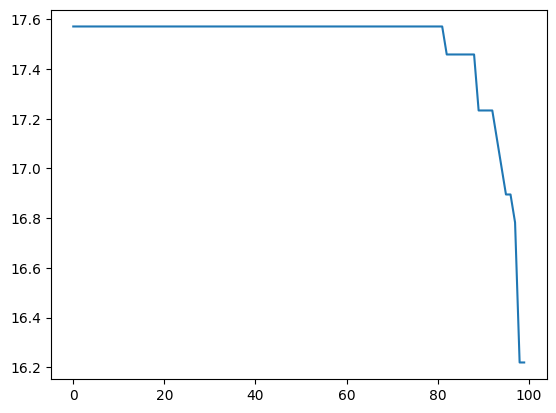

In [57]:
plt.plot(neuron.loss_hist)


Evaluation

In [58]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat)

0.5

In [59]:
y_hat[:, 0], y_test

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]))

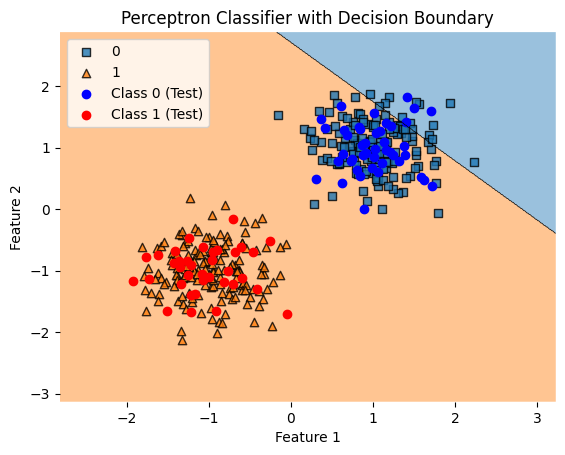

In [60]:
plot_decision_regions(X_train, y_train, clf=neuron, legend=2)

# Scatter plot for test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='blue', marker='o', label='Class 0 (Test)')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='red', marker='o', label='Class 1 (Test)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classifier with Decision Boundary')
plt.legend()
plt.show()
